In [1]:
# let's import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# let's import our file
df_sales = pd.read_csv("/Users/doris/OneDrive/Documents/Online Sales Data.csv")
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [2]:
# let's see table head
df_sales.head()
df_sales.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [3]:
# let's drop columns we don't need
df_sales = df_sales.drop(['Transaction ID'], axis='columns')
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              240 non-null    object 
 1   Product Category  240 non-null    object 
 2   Product Name      240 non-null    object 
 3   Units Sold        240 non-null    int64  
 4   Unit Price        240 non-null    float64
 5   Total Revenue     240 non-null    float64
 6   Region            240 non-null    object 
 7   Payment Method    240 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.1+ KB


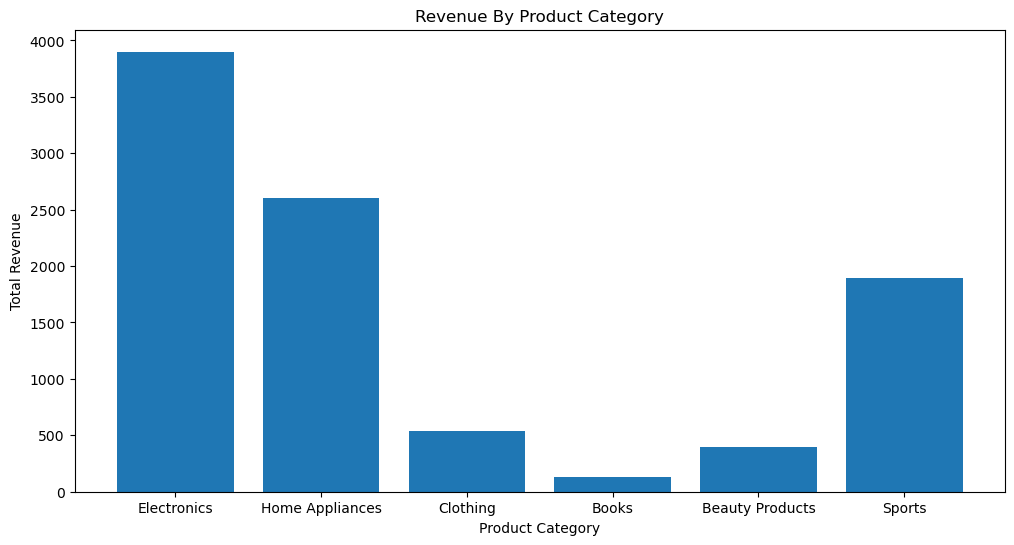

In [4]:
# let's visualize the relationship between the product category and total revenue
plt.figure(figsize=(12, 6))
plt.title('Revenue By Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.bar(df_sales['Product Category'], df_sales['Total Revenue'])
plt.show()

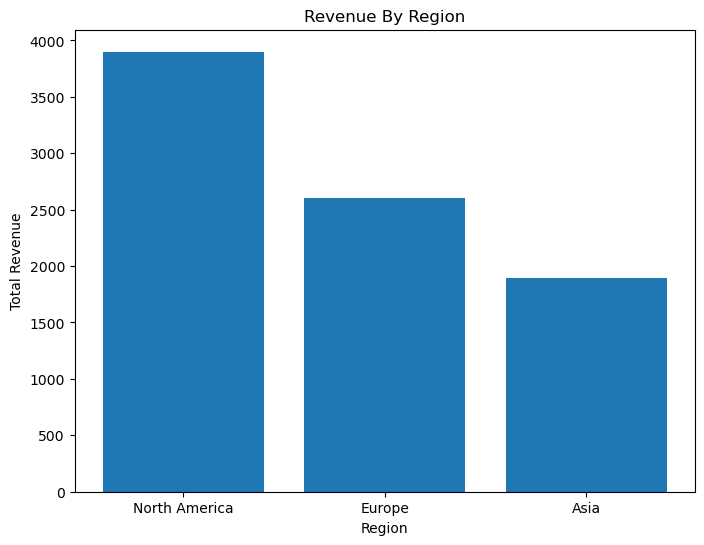

In [5]:
# let's visualize the relationship between the region and total revenue
plt.figure(figsize=(8, 6))
plt.title('Revenue By Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.bar(df_sales['Region'], df_sales['Total Revenue'])
plt.show()

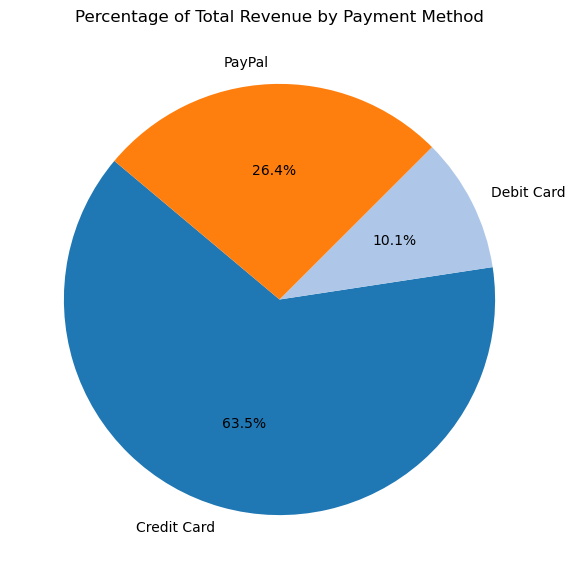

In [8]:
# let's visualize the payment distribution using a pie chart
# Ensure the columns are named correctly, e.g., 'Revenue' and 'Payment Method'
# Aggregate the data to get the total revenue per payment method
agg_df_sales = df_sales.groupby('Payment Method')['Total Revenue'].sum()

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(agg_df_sales, labels=agg_df_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# Customize the plot
plt.title('Percentage of Total Revenue by Payment Method')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Unit Price vs. Units Sold')

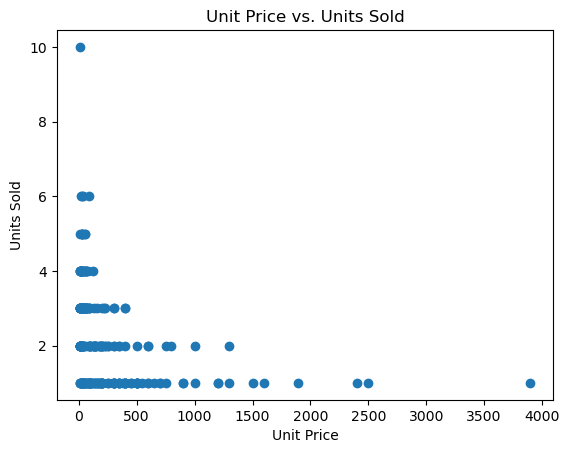

In [9]:
# Is there a relationship between the units sold and the unit price?
plt.scatter(x=df_sales['Unit Price'], y=df_sales['Units Sold'])
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.title('Unit Price vs. Units Sold')

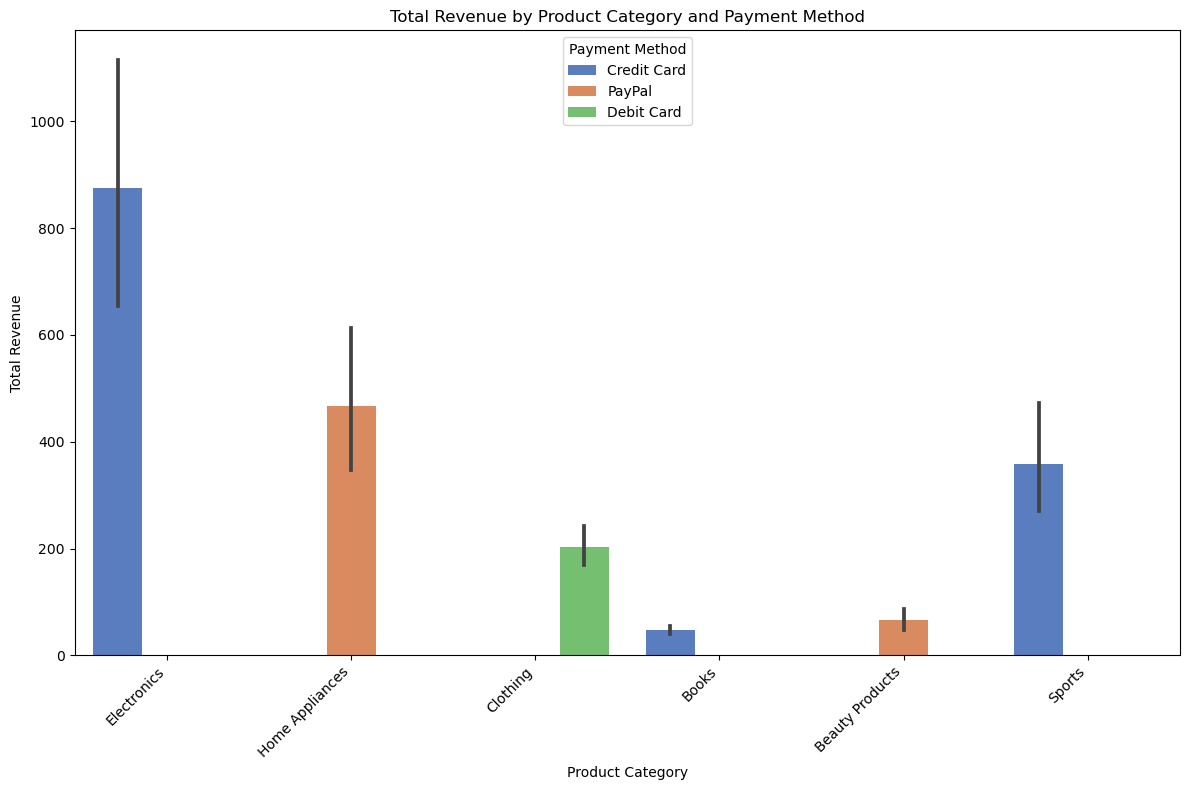

In [12]:
# let's visualize our Total Revenue breakdown by Product Category and Payment Method
# Plot the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Product Category', y='Total Revenue', hue='Payment Method', data=df_sales, palette='muted')
plt.title('Total Revenue by Product Category and Payment Method')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()